In [1]:
# pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# List of bank stock tickers (NSE)
tickers = [
    "HDFCBANK.NS",  # HDFC Bank Ltd
    "ICICIBANK.NS",  # ICICI Bank Ltd
    "KOTAKBANK.NS",  # Kotak Mahindra Bank Ltd
    "SBIN.NS",       # State Bank of India
    "AXISBANK.NS"    # Axis Bank Ltd
]

# Create a list to store individual DataFrames
dataframes = []

# Get yesterday's date
yesterday = datetime.now() - timedelta(days=1)

# Loop through each ticker and fetch the historical data
for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=(yesterday - pd.DateOffset(years=5)).strftime('%Y-%m-%d'), 
                          end=yesterday.strftime('%Y-%m-%d'))
    
    # Add a column for the ticker symbol
    hist['Ticker'] = ticker
    
    # Append the DataFrame to the list
    dataframes.append(hist)

# Concatenate all DataFrames into a single DataFrame
all_hist = pd.concat(dataframes)

# Print the combined historical market data
print(all_hist)

# Export the data to a CSV file
all_hist.to_csv('bank_stocks_historical_data.csv')

print("Data exported to bank_stocks_historical_data.csv")


                                  Open         High          Low        Close  \
Date                                                                            
2019-12-02 00:00:00+05:30  1222.964673  1222.964673  1208.229025  1215.092896   
2019-12-03 00:00:00+05:30  1217.444883  1218.212913  1203.621284  1205.157227   
2019-12-04 00:00:00+05:30  1202.373087  1206.597016  1184.805434  1201.557129   
2019-12-05 00:00:00+05:30  1205.349176  1208.373132  1191.093517  1195.749390   
2019-12-06 00:00:00+05:30  1198.965118  1209.572928  1188.645349  1196.181274   
...                                ...          ...          ...          ...   
2024-11-25 00:00:00+05:30  1160.000000  1164.500000  1142.000000  1155.900024   
2024-11-26 00:00:00+05:30  1157.099976  1159.599976  1142.650024  1144.800049   
2024-11-27 00:00:00+05:30  1145.199951  1155.449951  1133.550049  1149.650024   
2024-11-28 00:00:00+05:30  1148.500000  1154.449951  1129.400024  1132.500000   
2024-11-29 00:00:00+05:30  1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_load = pd.read_csv('bank_stocks_historical_data.csv')

In [5]:
print(data_load.columns)

print(data_load.dtypes)

print(data_load['Ticker'].unique())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object
['HDFCBANK.NS' 'ICICIBANK.NS' 'KOTAKBANK.NS' 'SBIN.NS' 'AXISBANK.NS']


In [6]:

line_break ="================================================================================================================="
colors = ['lightcoral', 'lightblue', 'lightgreen', 'peachpuff', 'lavender', 'mintcream', 'palegoldenrod', 'thistle', 'lightyellow', 'skyblue', 'lightpink', 'honeydew', 'lavenderblush']


In [7]:
stockname = 'HDFCBANK.NS'

In [8]:

data_load['Date'] = pd.to_datetime(data_load['Date']).dt.strftime('%Y-%m-%d')


# General Exploration

### 
1. How many rows and columns are in the dataset?


In [11]:
data_load.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')

### 2. What are the first five entries in the dataset?


In [13]:
data_load.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2019-12-02,1222.964673,1222.964673,1208.229025,1215.092896,4473102,0.0,0.0,HDFCBANK.NS


### 4. How many unique tickers are present?


In [15]:
data_load['Ticker'].unique()

array(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS',
       'AXISBANK.NS'], dtype=object)

### 5. How many missing values exist in each column?


In [17]:
data_load.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64

# Time Series Analysis

### 6. What is the date range in the dataset?


In [20]:
min_date = data_load['Date'].min()
max_date =  data_load['Date'].max()

print(f'Start data ==> {max_date}   End Date ==> {max_date}')

Start data ==> 2024-11-29   End Date ==> 2024-11-29


### 7. How does the closing price change over time for each ticker?

In [22]:
df_7 = data_load
print(df_7['Date'].dtypes)
print(line_break)
df_7['Date'] = pd.to_datetime(df_7['Date'] )
print(df_7['Date'].dtypes)
print(line_break)

object
datetime64[ns]


In [23]:
df_7.set_index('Date', inplace=True)

In [24]:
df_7 = df_7.groupby('Ticker').resample('YE').last()

In [25]:
df_7 = df_7[['Close']]
df_7.reset_index(inplace=True)

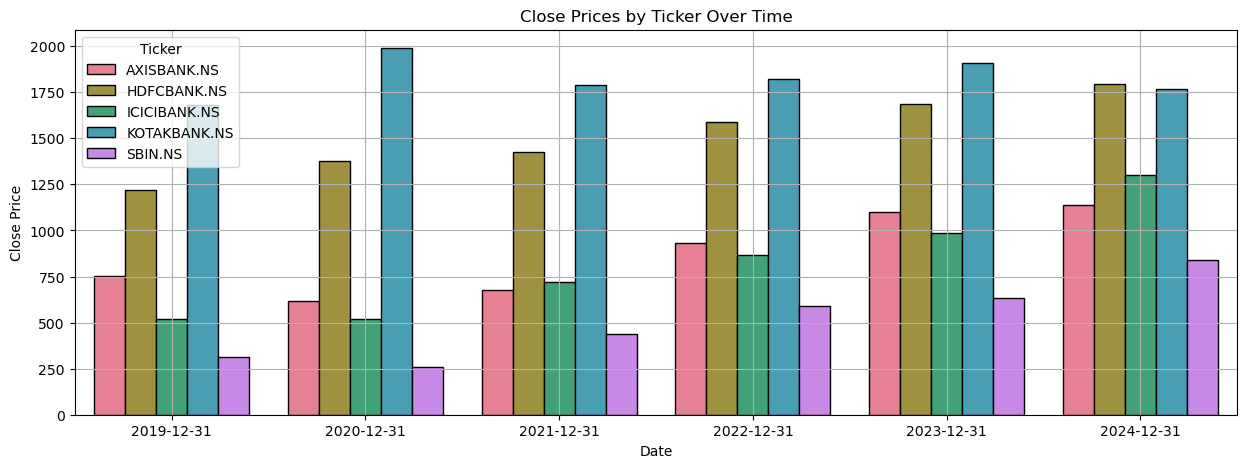

In [26]:
plt.figure(figsize=(15, 5))

# Adjust the palette to match the unique tickers
unique_tickers = df_7['Ticker'].nunique()
colors = sns.color_palette('husl', unique_tickers)

sns.barplot(data=df_7, hue='Ticker', x='Date', y='Close', palette=colors, edgecolor='black')
plt.grid()

plt.title('Close Prices by Ticker Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()


### 8. What are the top 5 dates with the highest closing prices?

In [28]:
df_8 = data_load

for ticker in df_8['Ticker'].unique():
    temp = df_8[df_8['Ticker'] == ticker]
    print(ticker)
    
    # Get the last 5 entries
    k = temp[['High', 'Ticker']].tail(5)
    
    print(k)
    print('-' * 20)


HDFCBANK.NS
                   High       Ticker
Date                                
2024-11-25  1803.550049  HDFCBANK.NS
2024-11-26  1810.000000  HDFCBANK.NS
2024-11-27  1817.349976  HDFCBANK.NS
2024-11-28  1836.099976  HDFCBANK.NS
2024-11-29  1804.599976  HDFCBANK.NS
--------------------
ICICIBANK.NS
                   High        Ticker
Date                                 
2024-11-25  1311.199951  ICICIBANK.NS
2024-11-26  1314.250000  ICICIBANK.NS
2024-11-27  1310.849976  ICICIBANK.NS
2024-11-28  1310.500000  ICICIBANK.NS
2024-11-29  1303.250000  ICICIBANK.NS
--------------------
KOTAKBANK.NS
                   High        Ticker
Date                                 
2024-11-25  1794.599976  KOTAKBANK.NS
2024-11-26  1795.949951  KOTAKBANK.NS
2024-11-27  1805.500000  KOTAKBANK.NS
2024-11-28  1788.900024  KOTAKBANK.NS
2024-11-29  1773.599976  KOTAKBANK.NS
--------------------
SBIN.NS
                  High   Ticker
Date                           
2024-11-25  849.599976  SBIN.NS
2024

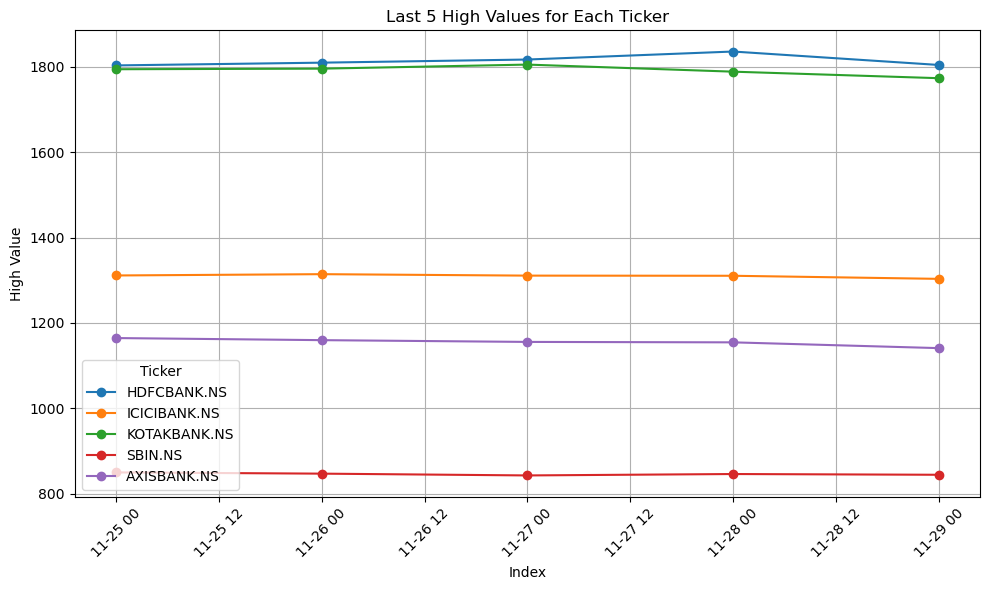

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_8 is already defined
df_8 = data_load

# Create a figure
plt.figure(figsize=(10, 6))

# Loop through each unique ticker
for ticker in df_8['Ticker'].unique():
    temp = df_8[df_8['Ticker'] == ticker]
    
    # Get the last 5 entries for 'High' values
    last_5 = temp[['High', 'Ticker']].tail(5)
    
    # Plot the 'High' values
    plt.plot(last_5.index, last_5['High'], marker='o', label=ticker)

# Adding titles and labels
plt.title('Last 5 High Values for Each Ticker')
plt.xlabel('Index')
plt.ylabel('High Value')
plt.xticks(rotation=45)
plt.legend(title='Ticker')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [30]:
print(df_8.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')


### 9. How does the trading volume vary over time?


In [32]:
df_9 = data_load
df_9['Year'] = 0
df_9.reset_index(inplace=True)
df_9['Year']=df_9['Date'].dt.year
df_9.set_index('Date',inplace=True)


In [33]:
from datetime import datetime
# Get the current year
current_year = datetime.now().year
# Display the current year
print(current_year)

2024


In [34]:
df_9= df_9[df_9['Year'] == current_year]
df_9= df_9[df_9['Ticker'] == stockname]
df_9 = df_9.resample('ME').last()
df_9['Volume_change_month_to_month'] = 0
df_9.reset_index(inplace=True)

In [35]:
start = df_9.index.min()
end = df_9.index.max()
for i in df_9.index:
    if start < i :
        #print(i)
        k = df_9.loc[i]['Volume'] - df_9.loc[i-1]['Volume']
        df_9.loc[i,'Volume_change_month_to_month'] = k
        #print(line_break)

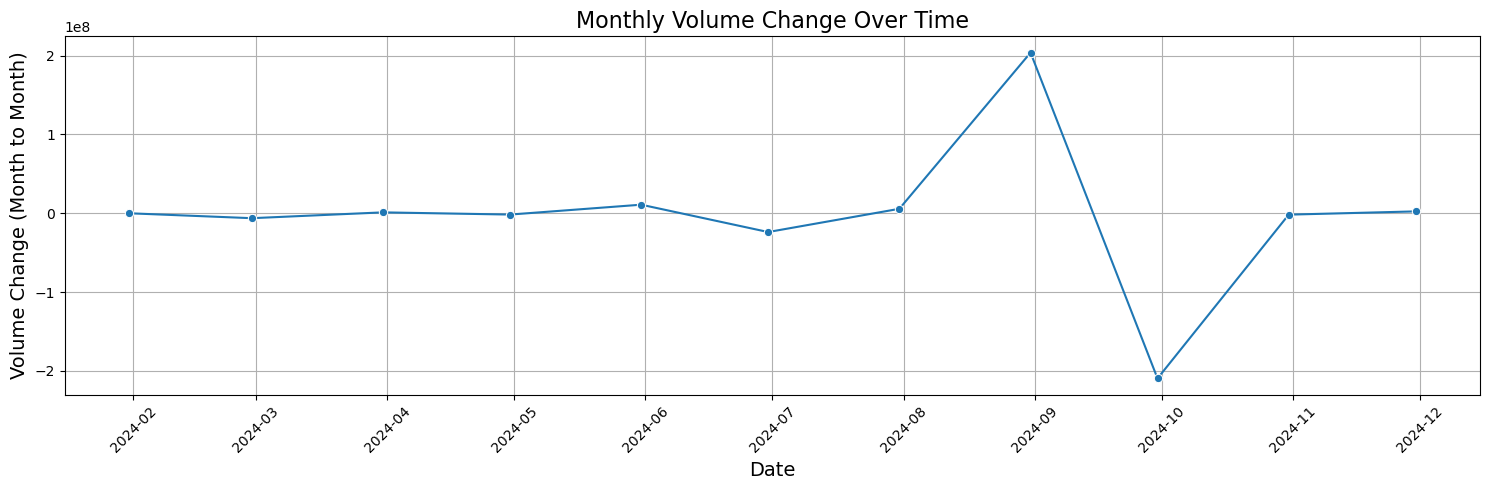

In [36]:
df_9 = df_9[['Date','Volume_change_month_to_month']]

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_9, x='Date', y='Volume_change_month_to_month', marker = 'o')


plt.title('Monthly Volume Change Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume Change (Month to Month)', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

### 11. What is the mean closing price for each ticker?
### 12. What is the median trading volume for each ticker?
### 13. What is the standard deviation of the closing prices for each ticker?
### 14. What are the minimum and maximum closing prices for each ticker?
### 15. What are the average daily returns for each ticker?



In [38]:
df_11 = data_load
df_11 = data_load
df_11['Year'] = 0
df_11.reset_index(inplace=True)
df_11['Year']=df_11['Date'].dt.year
df_11.set_index('Date',inplace=True)


In [39]:
df_11 =df_11[df_11['Year'] == current_year]


In [40]:
df_11 =df_11.groupby('Ticker').resample('ME').last()


AXISBANK.NS
count      11.000000
mean     1149.774447
std        66.867675
min      1046.392334
25%      1105.285461
50%      1161.253784
75%      1170.674988
max      1264.274292
Name: Close, dtype: float64
AXISBANK.NS


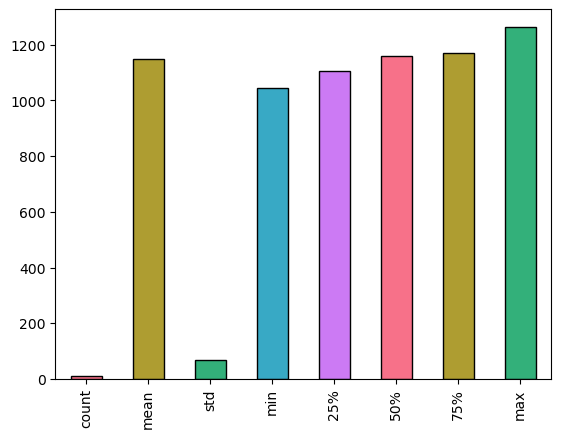

HDFCBANK.NS
count      11.000000
mean     1589.741655
std       140.396282
min      1384.494141
25%      1471.234619
50%      1615.750000
75%      1707.925049
max      1796.050049
Name: Close, dtype: float64
HDFCBANK.NS


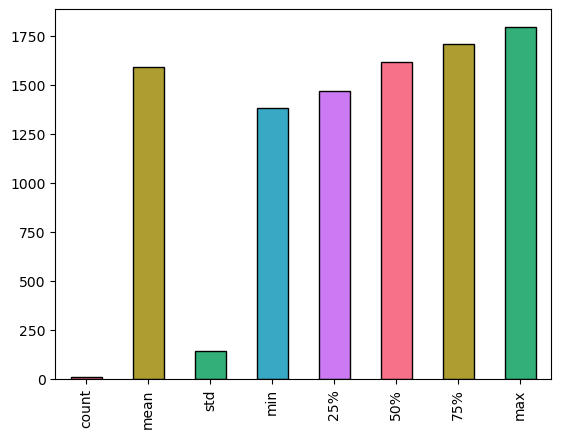

ICICIBANK.NS
count      11.000000
mean     1171.551442
std        98.983940
min      1019.374451
25%      1097.724976
50%      1189.360962
75%      1251.099976
max      1300.099976
Name: Close, dtype: float64
ICICIBANK.NS


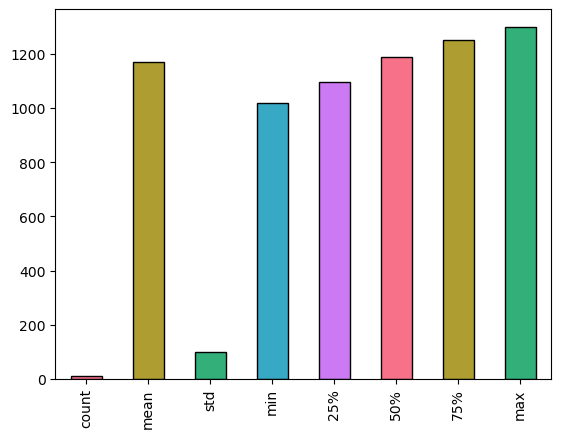

KOTAKBANK.NS
count      11.000000
mean     1757.696012
std        70.303828
min      1622.171997
25%      1709.350159
50%      1780.800049
75%      1804.213318
max      1853.949951
Name: Close, dtype: float64
KOTAKBANK.NS


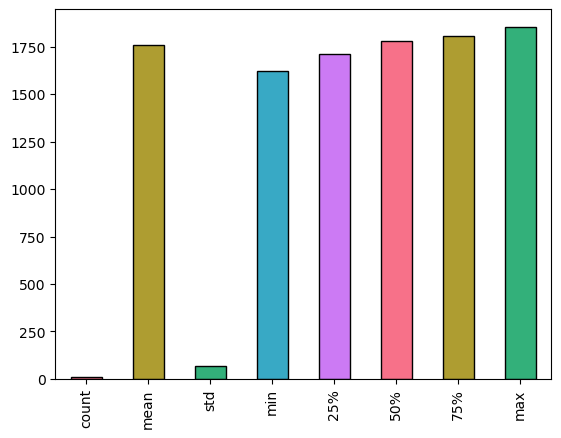

SBIN.NS
count     11.000000
mean     793.873790
std       68.757349
min      629.936157
25%      763.920715
50%      815.599976
75%      834.649994
max      872.400024
Name: Close, dtype: float64
SBIN.NS


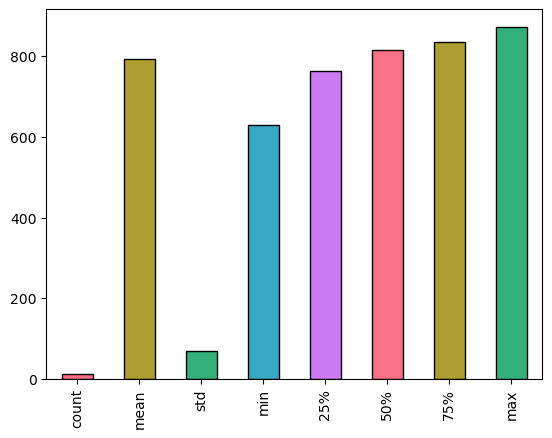

In [41]:
for i in df_11['Ticker'].unique():
    print (i)
    temp = df_11[df_11['Ticker']==i]
    print(temp['Close'].describe())
    print(line_break)
    print(i)
    temp['Close'].describe().plot(kind='bar', color=colors, edgecolor = 'black')
    plt.show()


# Visualizations


### 16. Can you plot the closing price over time for each ticker?

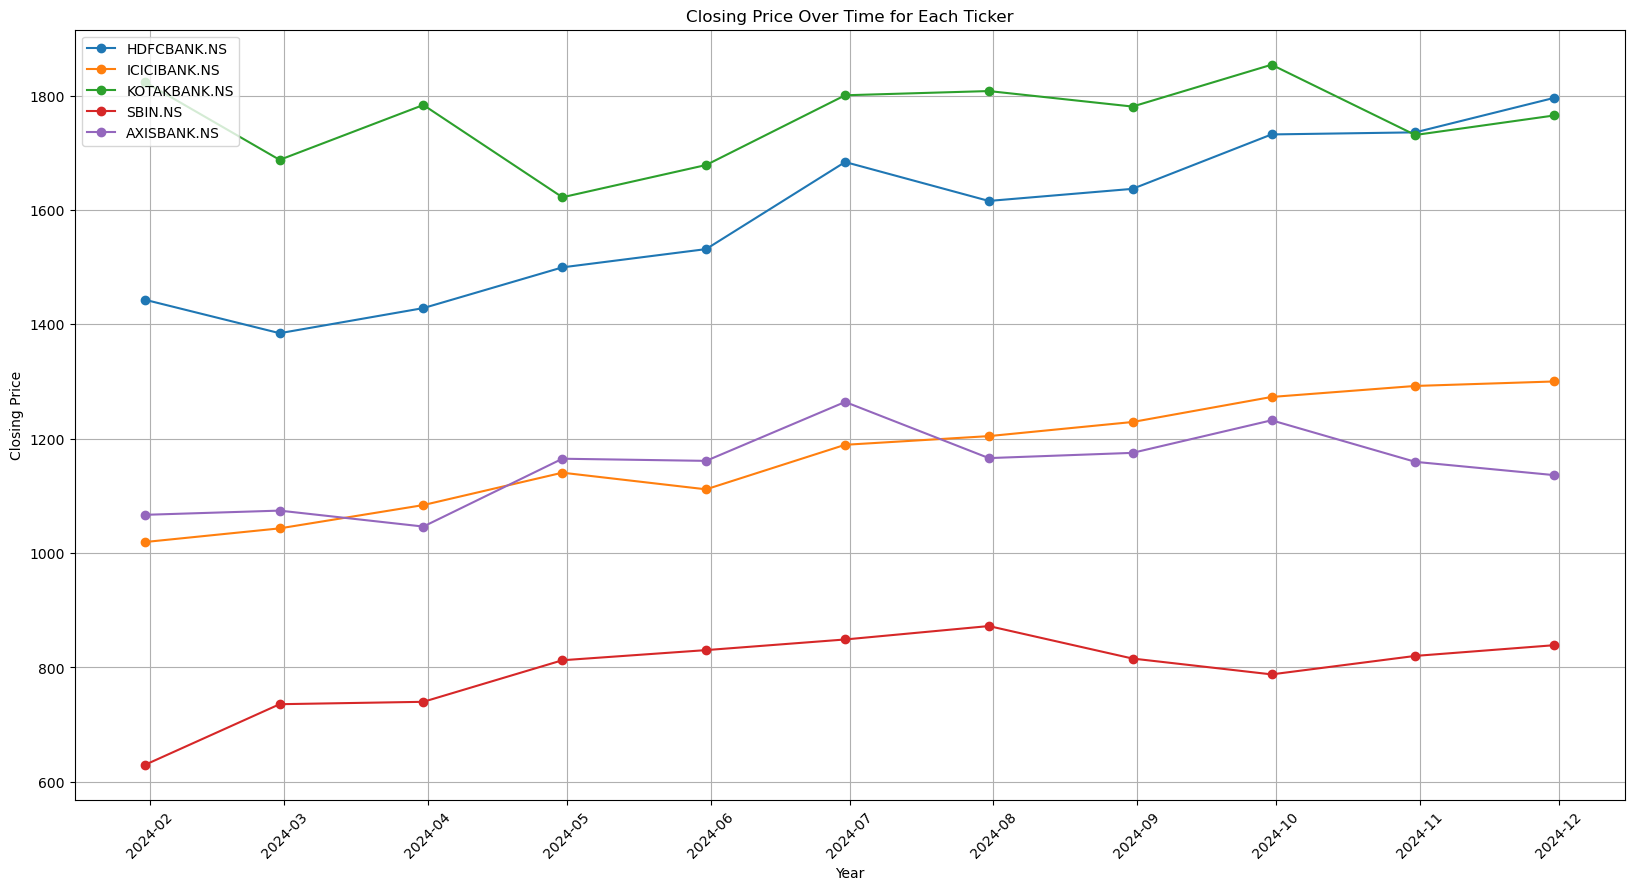

In [44]:
df_11 =data_load
df_11['Ticker'].unique()
df_11=  df_11[df_11['Year'] == current_year]

plt.figure(figsize=(20, 10)) 
for ticker in df_11['Ticker'].unique():
    temp = df_11[df_11['Ticker'] == ticker]  
    temp = temp.resample('ME').last()  
    plt.plot(temp.index, temp['Close'], marker='o', label=ticker)

plt.grid()
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time for Each Ticker')
plt.xticks(rotation=45)  
plt.legend(loc='upper left')
plt.show()

### 17. How does the trading volume distribute across different tickers?

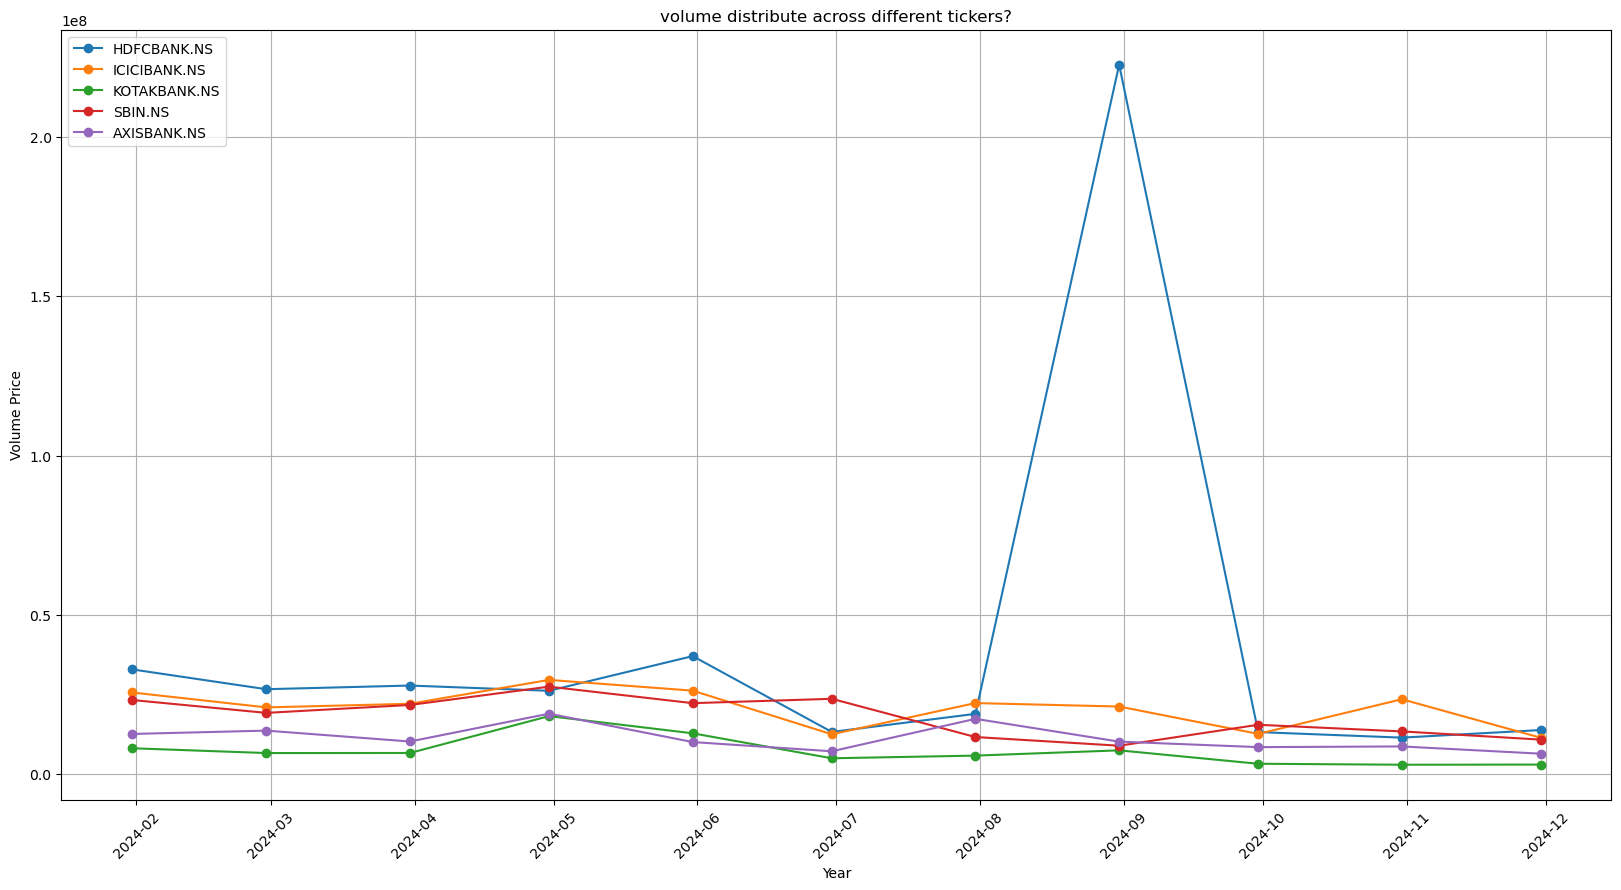

In [46]:
df_17 = data_load
df_17[df_17['Year'] == current_year]

df_11 =data_load
df_17['Ticker'].unique()
df_17=  df_17[df_17['Year'] == current_year]

plt.figure(figsize=(20, 10)) 
for ticker in df_17['Ticker'].unique():
    temp = df_17[df_17['Ticker'] == ticker]  
    #temp.set_index('Date', inplace=True) 
    temp = temp.resample('ME').last()      
    plt.plot(temp.index, temp['Volume'], marker='o', label=ticker)
    
plt.grid()
plt.xlabel('Year')
plt.ylabel('Volume Price')
plt.title('volume distribute across different tickers?')
plt.xticks(rotation=45)  
plt.legend(loc='upper left')
print(line_break)

### 18. Can you create a boxplot for the closing prices of each ticker?

In [48]:
# df_11 contains same data 
df_11 = df_11[['Close','Ticker']]

In [49]:
df_11.reset_index(inplace=True)

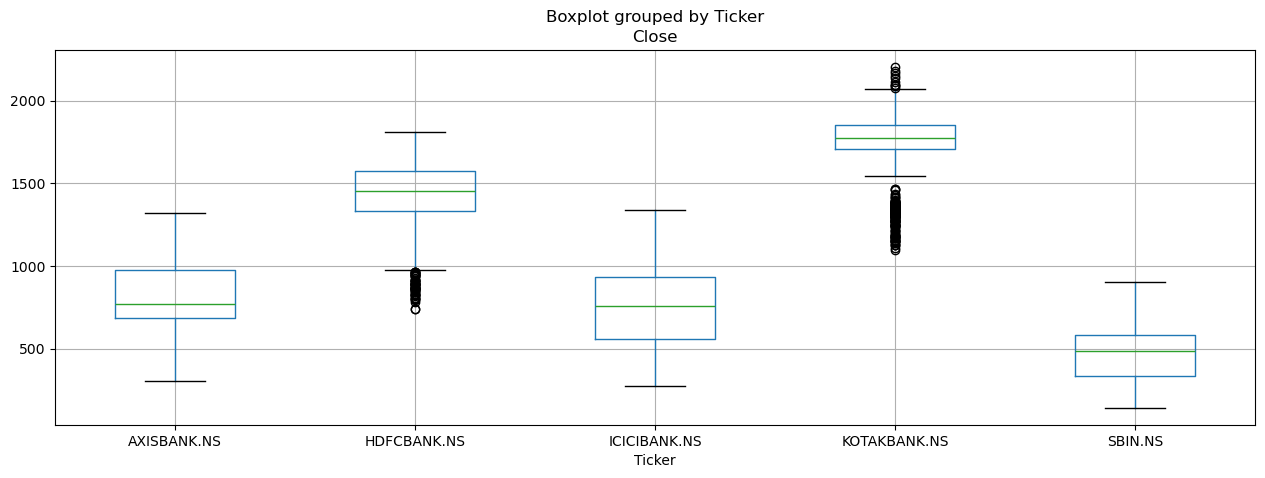

In [50]:
df_11.boxplot(column='Close', by='Ticker', figsize=(15,5))
plt.show()

### 19. What does a histogram of daily returns look like for each stock?

In [52]:
df_19 = data_load
df_19['Ticker'].unique()
df_19['Returns'] = 0.0
df_19.reset_index(inplace=True)
df_19=df_19[df_19['Year'] == current_year]

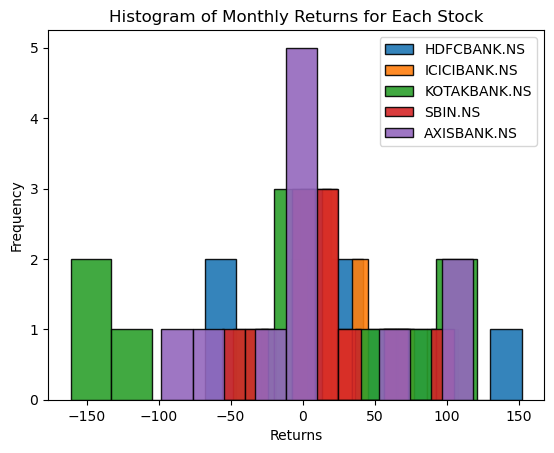

In [53]:
df_19.index
start = df_19.index.min()
end = df_19.index.max()
for stockname in df_19['Ticker'].unique():
   # print(stockname)
    temp = df_19[df_19['Ticker'] == stockname]
   # print(temp)
 #   print(line_break)
    temp.set_index('Date', inplace=True)
    temp= temp.resample('ME').last('Close')
    temp.reset_index(inplace=True)
    start = temp.index.min()
    end = temp.index.max()
    #print('end')
    for i in  temp.index:
        #print(stockname)
        if start<i< end:
            k =temp.loc[i]['Close'] - temp.loc[i-1]['Close'] 
            #print(k)
            temp.loc[i,'Returns']=int(k)
           # print(temp)
            temp[temp['Returns']!=0]


    plt.hist(temp['Returns'], bins=10, alpha=0.9,edgecolor = 'black', label=stockname)

plt.title('Histogram of Monthly Returns for Each Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 21. Which ticker has the highest average closing price?


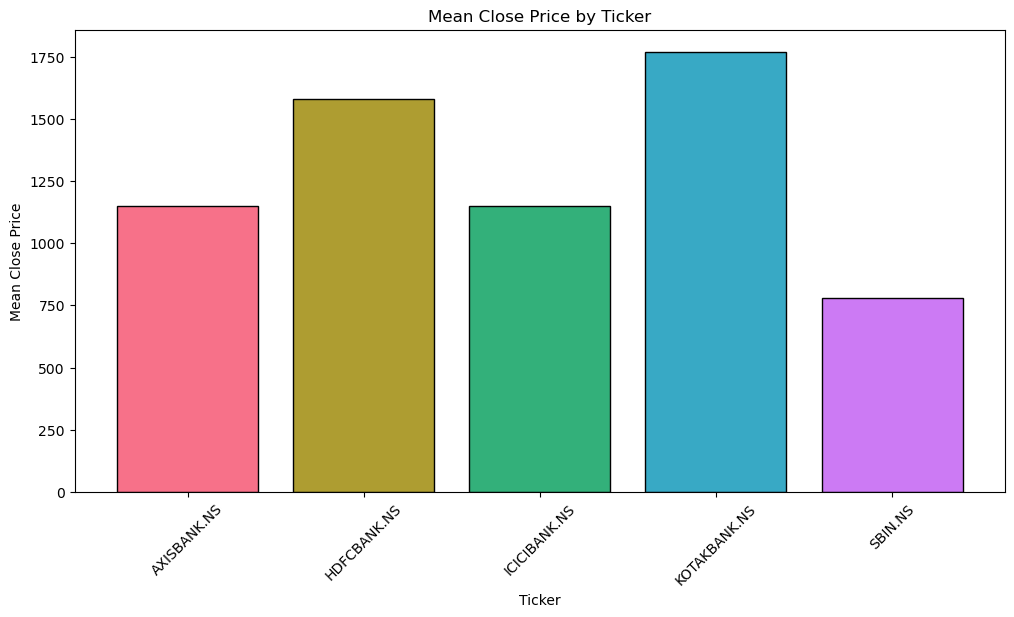

In [55]:
df_21 = data_load
df_21=df_21[df_21['Year'] == current_year]
df_21 = df_21.groupby(by='Ticker').mean('Close')
df_21.reset_index(inplace=True)
df_21
plt.figure(figsize=(12, 6))
plt.bar(df_21['Ticker'], df_21['Close'], color=colors,edgecolor='black')
plt.title('Mean Close Price by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Mean Close Price')
plt.xticks(rotation=45)
plt.show()

### 22. Which ticker shows the highest trading volume?

In [57]:
df_22 = data_load
df_22=df_22[df_22['Year'] == current_year]
temp = df_22.sort_values(by='Volume', ascending=False).head(5)[['Ticker','Volume','Date']]
print(temp.columns)

Index(['Ticker', 'Volume', 'Date'], dtype='object')


HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
AXISBANK.NS


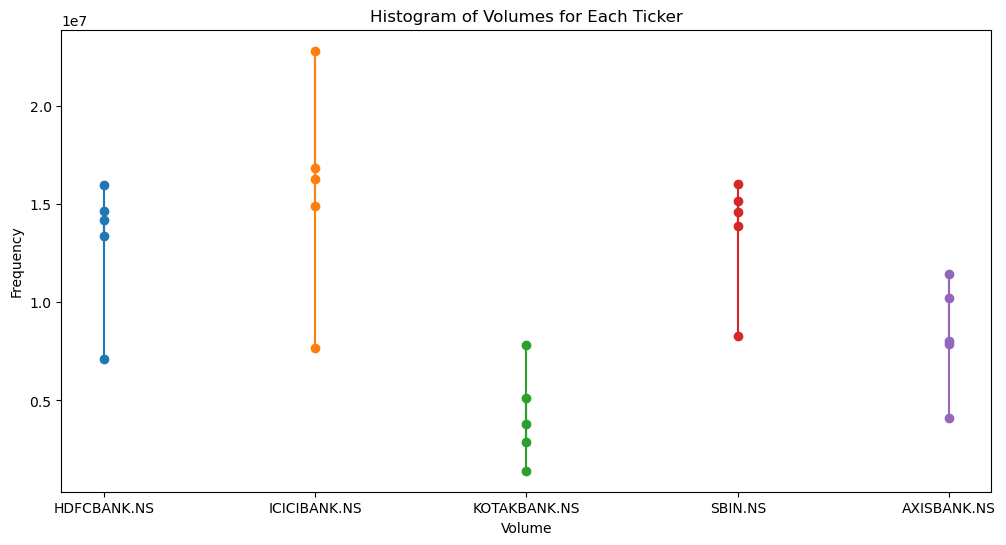

In [58]:
df_22 = data_load

plt.figure(figsize=(12, 6))

for s_name in df_22['Ticker'].unique():
    print(s_name)
    temp = df_22[(df_22['Ticker'] == s_name) & (df_22['Year'] == current_year)]
    temp = temp.head(5)
    plt.plot(temp['Ticker'] ,temp['Volume'],marker='o')


plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Volumes for Each Ticker')


plt.show()


### 23. What is the percentage change in closing price for each ticker over the entire period?

In [60]:
df_23 = data_load
df_23.set_index('Date', inplace=True)

In [61]:
df_23 = df_23.groupby('Ticker').resample('YE').last()
df_23['Returns'] = float(0)

In [62]:
df_23 = df_23[['Close','Returns']]
df_23.reset_index(inplace=True)

AXISBANK.NS
HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS


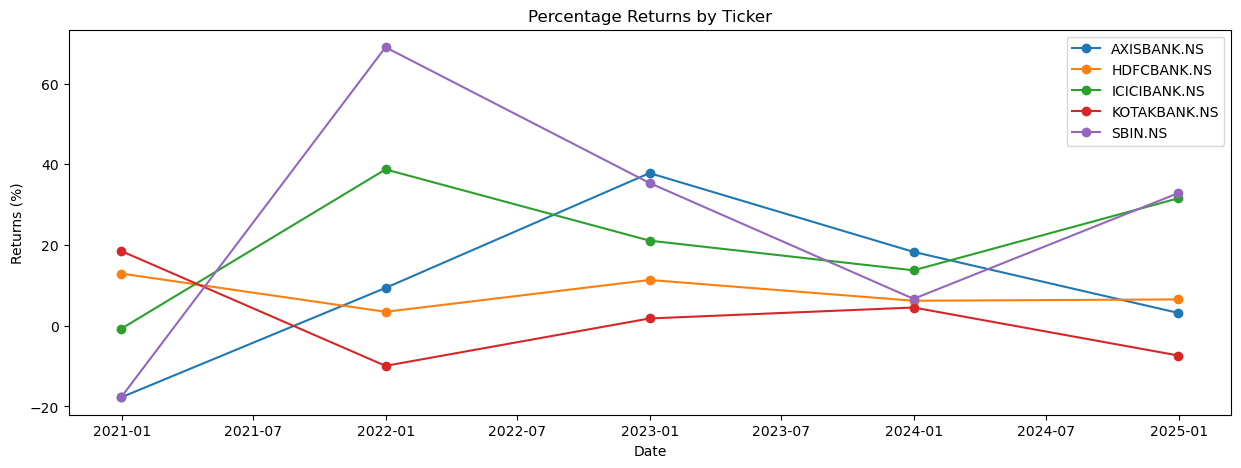

In [63]:
df_23['Ticker'].unique()

plt.figure(figsize=(15,5))
for s_name in df_23['Ticker'].unique():
    print(s_name)
    temp = df_23[df_23['Ticker'] == s_name]
    start = temp.index.min()
    end = temp.index.max()
    for i in temp.index:
        if start < i:
            value = temp.loc[i]['Close'] - temp.loc[i-1]['Close']
            value = (value/(temp.loc[i-1]['Close'])) * 100
            temp.loc[i , 'Returns' ] = (value)
    #print(temp)
    #print(line_break)
    temp = temp[temp['Returns']!= 0]
   # print(temp)
    temp

    plt.plot(temp['Date'], temp['Returns'], marker='o', label=s_name)

plt.title('Percentage Returns by Ticker')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.show()

### 24. How do the average closing prices compare among the tickers?

HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
AXISBANK.NS


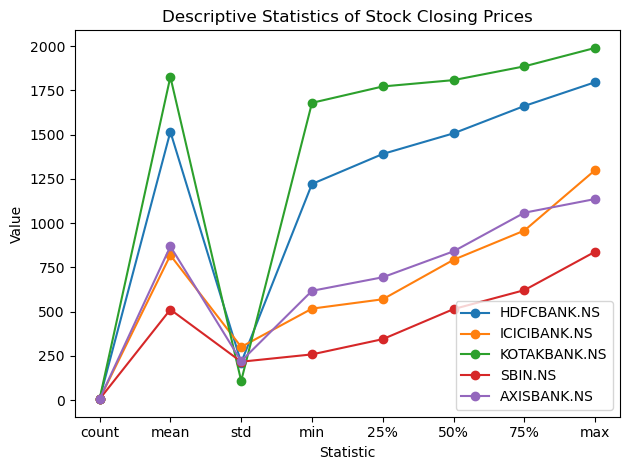

In [65]:
df24 = data_load

for stock_name in df24['Ticker'].unique():
    print(stock_name)
    test = df24.groupby('Ticker').resample('YE').last()
    desc = test[test['Ticker'] == stock_name]['Close'].describe()
    
    plt.plot(desc,marker = 'o',label=stock_name )
plt.legend()
plt.title('Descriptive Statistics of Stock Closing Prices')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


### 25. Which stock has the most volatility based on daily returns?
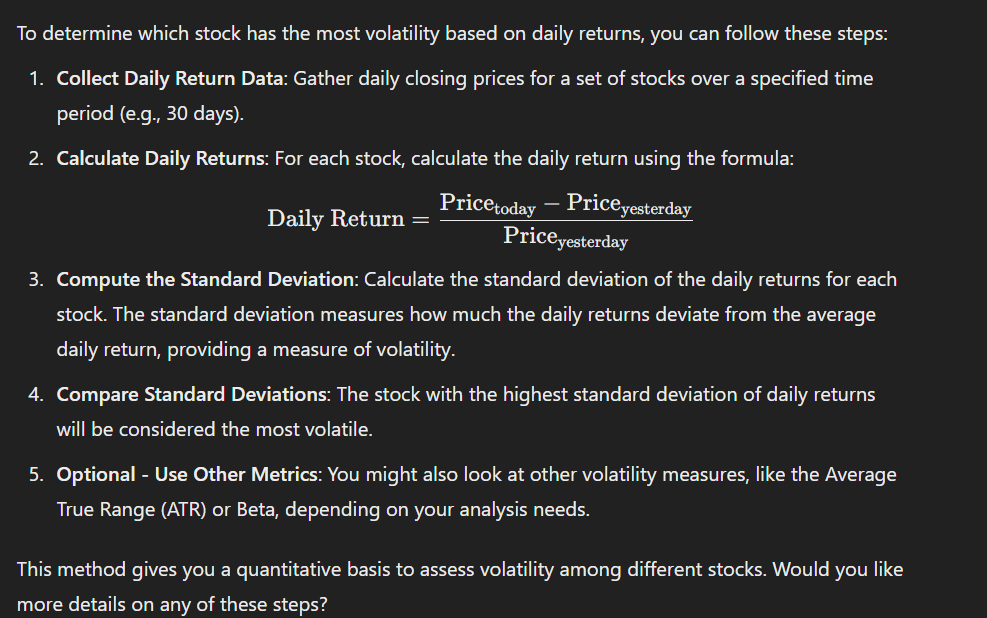

In [67]:
df_25 = data_load
df_25 = df_25.groupby('Ticker').resample('ME').last()
df_25= df_25[df_25['Year'] == current_year]
df_25 = df_25[['Close', 'Returns']]
df_25.reset_index(inplace = True)


AXISBANK.NS
HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS


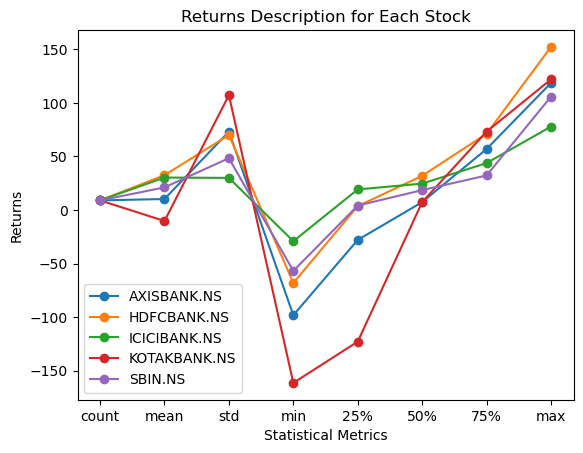

In [68]:
df_25['Ticker'].unique()

for stock_name in df_25['Ticker'].unique():
    print(stock_name)    
    test=df_25[df_25['Ticker'] == stock_name] 
    start = test.index.min()
    end = test.index.max()    
    for i in test.index:
        if start<i<end:
            test.loc[i , 'Returns'] = (test.loc[i]['Close'] - test.loc[i-1]['Close'])
    test=test[test['Returns'] != 0]
    desc = test['Returns'].describe()
    plt.plot(desc.index,desc.values, label=stock_name, marker = 'o' )

plt.xlabel('Statistical Metrics')
plt.ylabel('Returns')
plt.title('Returns Description for Each Stock')
plt.legend()
plt.show()
            